In [2]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_excel("Data.xlsx")

# Chuẩn hóa tên cột (phòng trường hợp bị sai tên)
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Kiểm tra xem cột có tồn tại không
if "question" not in df.columns or "answer" not in df.columns:
    raise ValueError("File Excel không có cột 'question' hoặc 'answer'!")

# Xóa khoảng trắng và thay thế xuống dòng bằng ký tự '\\n'
df["question"] = df["question"].astype(str).str.strip().replace(r'\s*\n\s*', '\\n', regex=True)
df["answer"] = df["answer"].astype(str).str.strip().replace(r'\s*\n\s*', '\\n', regex=True)

# Xóa dòng trùng lặp & dữ liệu thiếu
df = df.drop_duplicates().dropna()

# Lưu lại file mới
df.to_excel("Cleaned_Data.xlsx", index=False, engine='openpyxl')

print("Xử lý dữ liệu xong! File đã lưu thành Cleaned_Data.xlsx.")


Xử lý dữ liệu xong! File đã lưu thành Cleaned_Data.xlsx.


In [2]:
import itertools
import pandas as pd
import random

# Đọc dữ liệu từ file Excel
file_path = "Cleaned_Data.xlsx"
df = pd.read_excel(file_path)

# Hàm tạo biến thể câu hỏi an toàn (không làm thay đổi dữ liệu gốc)
def generate_question_variants_safe(question):
    words = question.split()
    variants = [question]  # Giữ câu gốc

    if len(words) > 5:
        shuffled_words = words[:]  # Sao chép danh sách tránh thay đổi gốc
        random.shuffle(shuffled_words)
        variant_1 = " ".join(shuffled_words)

        variant_2 = question.replace("là gì", "được hiểu như thế nào").replace("như thế nào", "ra sao")

        variants.extend([variant_1, variant_2])

    return variants

# Tạo tập dữ liệu kiểm tra
test_questions = []
test_answers = []

for q, a in zip(df["question"], df["answer"]):
    variants = generate_question_variants_safe(q)
    test_questions.extend(variants)
    test_answers.extend([a] * len(variants))  # Đảm bảo câu trả lời khớp

# Kiểm tra độ dài hai danh sách trước khi tạo DataFrame
assert len(test_questions) == len(test_answers), "Số lượng câu hỏi và câu trả lời không khớp!"

# Đóng gói vào DataFrame
test_df = pd.DataFrame({"question": test_questions, "answer": test_answers})

# Xuất file Excel
test_file_path = "Test_Data_Fixed.xlsx"
test_df.to_excel(test_file_path, index=False)

test_file_path


'Test_Data_Fixed.xlsx'

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


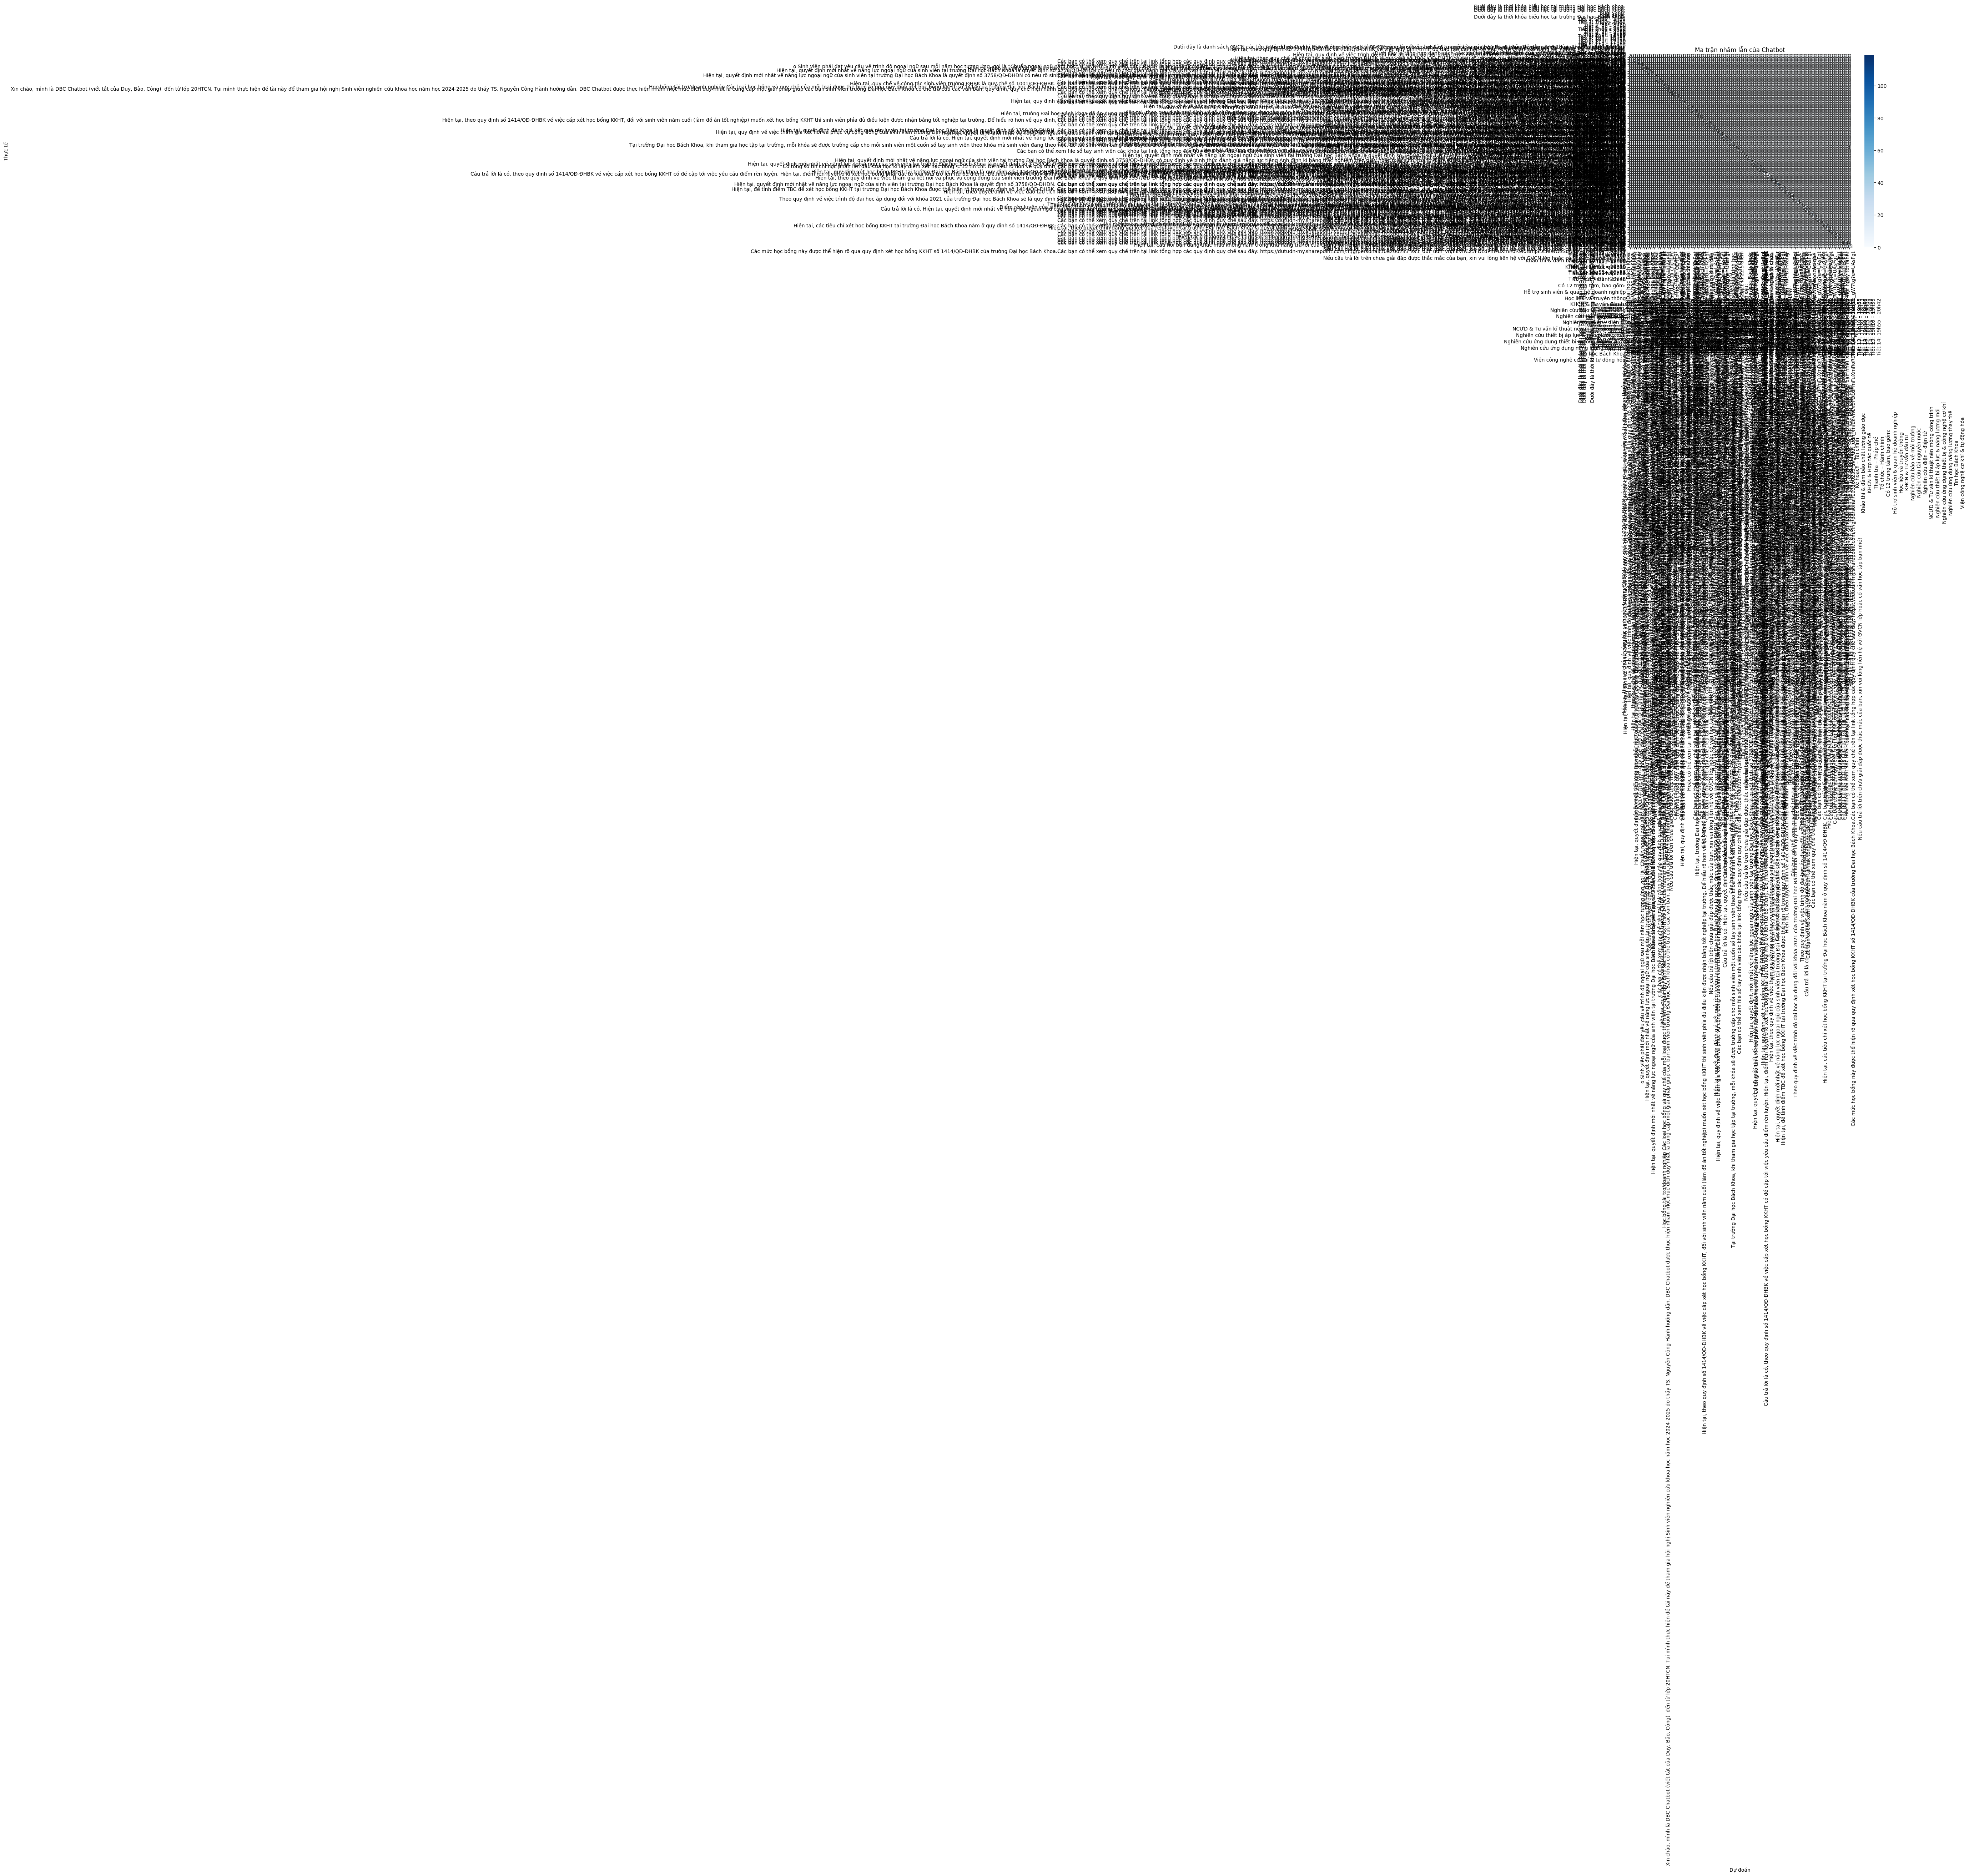

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

🎯 Độ chính xác (Accuracy): 69.09%
📊 Độ tương đồng trung bình giữa câu trả lời thực tế và dự đoán: 71.70%

📄 Báo cáo chi tiết:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from difflib import get_close_matches
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from fuzzywuzzy import fuzz

# Đọc dữ liệu huấn luyện từ file Excel
train_file = "Cleaned_Data.xlsx"
df_train = pd.read_excel(train_file, sheet_name="Sheet1")

# Tạo từ điển câu hỏi - câu trả lời
qa_dict = dict(zip(df_train["question"], df_train["answer"]))

# Hàm tìm câu hỏi khớp tốt nhất
def find_best_match(user_question, questions, threshold=0.6):
    matches = get_close_matches(user_question, questions, n=1, cutoff=threshold)
    return matches[0] if matches else None

# Hàm hỏi chatbot
def ask_chatbot(question):
    best_match = find_best_match(question, qa_dict.keys())
    if best_match:
        return qa_dict[best_match]
    return "Không tìm thấy câu trả lời"

# Đọc tập kiểm tra từ file Test_Data_Fixed.xlsx
test_file = "Test_Data_Fixed.xlsx"
df_test = pd.read_excel(test_file)

# Kiểm tra dữ liệu
if "question" not in df_test.columns or "answer" not in df_test.columns:
    raise ValueError("File kiểm tra không có cột 'question' hoặc 'answer'.")

# Thực hiện dự đoán bằng chatbot
df_test["predicted_answer"] = df_test["question"].apply(ask_chatbot)

# Tính độ chính xác (Accuracy)
accuracy = accuracy_score(df_test["answer"], df_test["predicted_answer"])

# Tính ma trận nhầm lẫn
labels = list(set(df_test["answer"]))  # Lấy danh sách nhãn duy nhất
conf_matrix = confusion_matrix(df_test["answer"], df_test["predicted_answer"], labels=labels)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn của Chatbot")
plt.show()

# Đánh giá chi tiết với classification report
report = classification_report(df_test["answer"], df_test["predicted_answer"])

# Tính độ tương đồng giữa câu trả lời thực tế và dự đoán
df_test["similarity"] = df_test.apply(lambda row: fuzz.ratio(str(row["answer"]), str(row["predicted_answer"])), axis=1)
avg_similarity = df_test["similarity"].mean()

# Xuất file kết quả kiểm tra
output_file = "Chatbot_Evaluation.xlsx"
df_test.to_excel(output_file, index=False)

# In kết quả
print(f"🎯 Độ chính xác (Accuracy): {accuracy:.2%}")
print(f"📊 Độ tương đồng trung bình giữa câu trả lời thực tế và dự đoán: {avg_similarity:.2f}%")
print("\n📄 Báo cáo chi tiết:\n", report)
print(f"✅ File kết quả đã lưu: {output_file}")


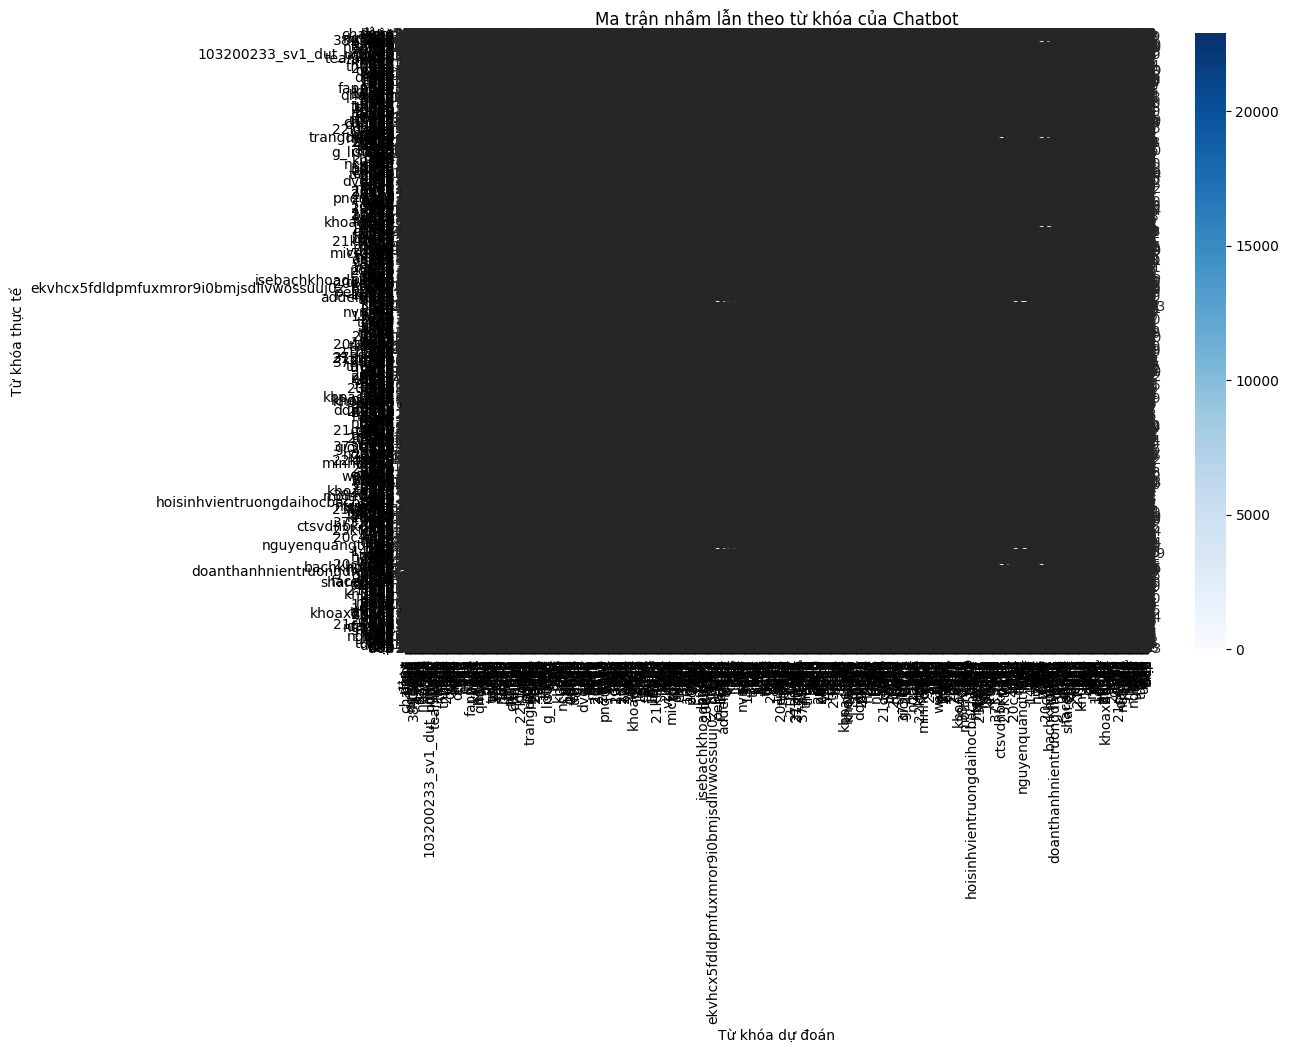

✅ Ma trận nhầm lẫn theo từ khóa đã được tạo và lưu vào file: Chatbot_Keyword_Confusion_Matrix.xlsx


In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from difflib import get_close_matches
from sklearn.metrics import confusion_matrix
from collections import Counter
import re

# Đọc dữ liệu huấn luyện từ file Excel
train_file = "Cleaned_Data.xlsx"
df_train = pd.read_excel(train_file, sheet_name="Sheet1")

# Tạo từ điển câu hỏi - câu trả lời
qa_dict = dict(zip(df_train["question"], df_train["answer"]))

# Hàm tìm câu hỏi khớp tốt nhất
def find_best_match(user_question, questions, threshold=0.6):
    matches = get_close_matches(user_question, questions, n=1, cutoff=threshold)
    return matches[0] if matches else None

# Hàm chatbot trả lời
def ask_chatbot(question):
    best_match = find_best_match(question, qa_dict.keys())
    if best_match:
        return qa_dict[best_match]
    return "Không tìm thấy câu trả lời"

# Hàm trích xuất từ khóa (lọc bỏ stopwords, giữ lại danh từ chính)
def extract_keywords(text):
    words = re.findall(r'\b\w+\b', str(text).lower())  # Tách từ
    return [word for word in words if len(word) > 2]  # Loại bỏ từ quá ngắn

# Đọc tập kiểm tra từ file Test_Data_Fixed.xlsx
test_file = "Test_Data_Fixed.xlsx"
df_test = pd.read_excel(test_file)

# Kiểm tra dữ liệu
if "question" not in df_test.columns or "answer" not in df_test.columns:
    raise ValueError("File kiểm tra không có cột 'question' hoặc 'answer'.")

# Thực hiện dự đoán bằng chatbot
df_test["predicted_answer"] = df_test["question"].apply(ask_chatbot)

# Trích xuất từ khóa từ câu trả lời thực tế và câu trả lời chatbot
df_test["actual_keywords"] = df_test["answer"].apply(extract_keywords)
df_test["predicted_keywords"] = df_test["predicted_answer"].apply(extract_keywords)

# Đếm số lần xuất hiện của từ khóa
actual_keyword_counts = Counter([kw for kws in df_test["actual_keywords"] for kw in kws])
predicted_keyword_counts = Counter([kw for kws in df_test["predicted_keywords"] for kw in kws])

# Lấy danh sách từ khóa chung
all_keywords = list(set(actual_keyword_counts.keys()).union(set(predicted_keyword_counts.keys())))

# Tạo ma trận nhầm lẫn theo từ khóa
conf_matrix = np.zeros((len(all_keywords), len(all_keywords)), dtype=int)

# Lập chỉ mục cho từ khóa
keyword_index = {kw: i for i, kw in enumerate(all_keywords)}

# Điền dữ liệu vào ma trận nhầm lẫn
for actual_kws, predicted_kws in zip(df_test["actual_keywords"], df_test["predicted_keywords"]):
    for actual_kw in actual_kws:
        for predicted_kw in predicted_kws:
            conf_matrix[keyword_index[actual_kw]][keyword_index[predicted_kw]] += 1

# Vẽ ma trận nhầm lẫn theo từ khóa
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=all_keywords, yticklabels=all_keywords)
plt.xlabel("Từ khóa dự đoán")
plt.ylabel("Từ khóa thực tế")
plt.title("Ma trận nhầm lẫn theo từ khóa của Chatbot")
plt.show()

# Xuất file kết quả
output_file = "Chatbot_Keyword_Confusion_Matrix.xlsx"
df_test.to_excel(output_file, index=False)

# In kết quả
print(f"✅ Ma trận nhầm lẫn theo từ khóa đã được tạo và lưu vào file: {output_file}")


In [ ]:
import os
import pandas as pd
import json
from difflib import get_close_matches
from flask import Flask, request, jsonify

# Đường dẫn file JSON lưu dữ liệu
json_file_path = "qa_data.json"

# Nếu file JSON chưa tồn tại, đọc từ Excel và lưu lại
if not os.path.exists(json_file_path):
    file_path = "Data.xlsx"
    df = pd.read_excel(file_path, sheet_name="Sheet1")
    qa_dict = dict(zip(df["question"], df["answer"]))
    with open(json_file_path, "w", encoding="utf-8") as f:
        json.dump(qa_dict, f, ensure_ascii=False, indent=4)
else:
    with open(json_file_path, "r", encoding="utf-8") as f:
        qa_dict = json.load(f)

def find_best_match(user_question, questions, threshold=0.6):
    matches = get_close_matches(user_question, questions, n=1, cutoff=threshold)
    return matches[0] if matches else None

# Khởi tạo Flask app
app = Flask(__name__)

@app.route("/chatbot", methods=["POST"])
def chatbot():
    data = request.get_json()
    user_question = data.get("question", "").strip()
    
    if not user_question:
        return jsonify({"error": "Vui lòng cung cấp câu hỏi."}), 400
    
    best_match = find_best_match(user_question, qa_dict.keys())
    answer = qa_dict[best_match] if best_match else "Xin lỗi, tôi không tìm thấy câu trả lời phù hợp."
    
    return jsonify({"question": user_question, "answer": answer})

# if __name__ == "__main__":
#     app.run(host="0.0.0.0", port=5000, debug=True)
if __name__ == "__main__":
    while True:
        user_input = input("Bạn: ")
        if user_input.lower() == "exit":
            break
        
        best_match = find_best_match(user_input, qa_dict.keys())
        answer = qa_dict[best_match] if best_match else "Xin lỗi, tôi không tìm thấy câu trả lời phù hợp."
        
        print("Chatbot:", answer)


    
